
Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

Edición 2022

---
<font color='MediumBlue'><strong><br>
Análisis y Visualización de Datos<br>
GRUPO 16 -Integrantes:<br></strong>
- Fernanda Borghello,<br>
- Santiago Pfluger,<br>
- Rodrigo Ruiz,<br>
- Alfonsina Szpeiner
</font>
---
# Trabajo práctico entregable - Parte 2

<font color='MediumBlue'><strong>
Paso 1: Se importan las librerias

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#seaborn.set_context('talk')

<font color='MediumBlue'><strong>
Paso 2: Lectura del data set

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


<font color='MediumBlue'><strong>
Paso 3: Seleccionar las columnas relevantes para analizar</strong><br>
Segun el ejercicio planteado se seleccionan como columnas relevantes: profile_gender y salary_monthly_NETO

In [4]:
df = df[['profile_gender', 'salary_monthly_NETO']]
df

,profile_gender,salary_monthly_NETO
0,Mujer,43000.000
1,Hombre,63000.000
2,Mujer,127000.000
3,Hombre,102000.000
4,Hombre,106000.000
...,...,...
6090,Hombre,97000.000
6091,Hombre,71000.000
6092,Hombre,45.753
6093,Hombre,72.000


<font color='MediumBlue'><strong>
Paso 4: Filtro la columna salary_monthly_NETO </strong><br>
Para esto, se adoptan los mismos criterios que en la Parte 1



In [5]:
Q1 = df["salary_monthly_NETO"].quantile(.10)
Q3 = df["salary_monthly_NETO"].quantile(.90)
IQR = Q3 - Q1
df_filt = df[~((df['salary_monthly_NETO']<(Q1))|(df['salary_monthly_NETO']>(Q3)))]
df_filt= df_filt.dropna() #Borro las filas NaN
df_filt['Grupo'] = df['profile_gender'].apply(lambda x: 'GrupoA' if x == 'Hombre' else 'GrupoB') #Agrego una nueva columna 'Grupo' para hacer grafico de cajas segmentado por Grupo

df_filt

,profile_gender,salary_monthly_NETO,Grupo
0,Mujer,43000.0,GrupoB
1,Hombre,63000.0,GrupoA
2,Mujer,127000.0,GrupoB
3,Hombre,102000.0,GrupoA
4,Hombre,106000.0,GrupoA
...,...,...,...
6088,Hombre,56450.0,GrupoA
6089,Hombre,130000.0,GrupoA
6090,Hombre,97000.0,GrupoA
6091,Hombre,71000.0,GrupoA


In [6]:
df_filt.groupby('profile_gender').describe()

salary_monthly_NETO                                       \
                             count          mean           std      min   
profile_gender                                                            
Hombre                      3977.0  80736.256784  28544.047774  35000.0   
Mujer                        753.0  74089.292058  27707.854443  35000.0   
Otros                         22.0  73068.181818  33371.635894  35900.0   

                                                      
                    25%      50%       75%       max  
profile_gender                                        
Hombre          57926.0  79000.0  100000.0  150000.0  
Mujer           52000.0  69100.0   92000.0  150000.0  
Otros           41250.0  68000.0   97600.0  140000.0

In [7]:
grupoA = df_filt[(df_filt['profile_gender'] == 'Hombre')].reset_index() #Todos los Hombres
grupoB = df_filt[~(df_filt['profile_gender'] == 'Hombre')].reset_index() #Todos los que no son hombres
grupoB

,index,profile_gender,salary_monthly_NETO,Grupo
0,0,Mujer,43000.0,GrupoB
1,2,Mujer,127000.0,GrupoB
2,9,Otros,39000.0,GrupoB
3,17,Mujer,70000.0,GrupoB
4,25,Mujer,98700.0,GrupoB
...,...,...,...,...
770,6053,Mujer,69000.0,GrupoB
771,6056,Mujer,50000.0,GrupoB
772,6057,Mujer,57000.0,GrupoB
773,6058,Mujer,57000.0,GrupoB


Text(0.5, 0, 'Salario mensual neto')

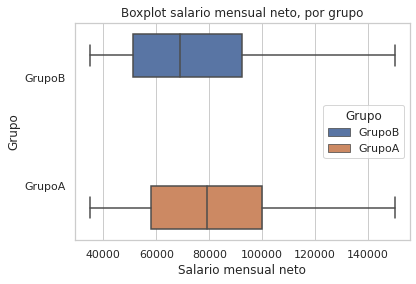

In [8]:
#plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="salary_monthly_NETO", y="Grupo", hue="Grupo",
                 data=df_filt).set(title='Boxplot salario mensual neto, por grupo')
plt.xlabel("Salario mensual neto")

## Ejercicio 1: Estimación


In [9]:
xA = grupoA['salary_monthly_NETO'].mean()
xB = grupoB['salary_monthly_NETO'].mean()
print('La media del Salario NETO del Grupo A es:',round(xA,2))
print('La media del Salario NETO del Grupo B es:',round(xB,2))

La media del Salario NETO del Grupo A es: 80736.26
La media del Salario NETO del Grupo B es: 74060.31


In [10]:
sA = grupoA['salary_monthly_NETO'].std()
sB = grupoB['salary_monthly_NETO'].std()
print('La desviación típica del Salario NETO del Grupo A es:',round(sA,2))
print('La desviación típica del Salario NETO del Grupo B es:',round(sB,2))

La desviación típica del Salario NETO del Grupo A es: 28544.05
La desviación típica del Salario NETO del Grupo B es: 27859.43


In [11]:
nA = grupoA['salary_monthly_NETO'].count() #Tamaño de la muestra del Grupo A
nB = grupoB['salary_monthly_NETO'].count() #Tamaño de la muestra del Grupo B
print('El tamaño de la muestra del Grupo A es:',nA)
print('El tamaño de la muestra del Grupo B es:',nB)

El tamaño de la muestra del Grupo A es: 3977
El tamaño de la muestra del Grupo B es: 775


In [12]:
resta_medias = xA - xB
print ('La estimacion puntual de la resta de las Medias de los Salarios es:', round(resta_medias,2))

La estimacion puntual de la resta de las Medias de los Salarios es: 6675.95


<font color='MediumBlue'><strong>
Intervalo de confianza para la media de nivel 0.95, utilizamos el score Z (alpha/2)=1.96.


In [13]:
alpha = 0.05
z_0975 = 1.96

estadistico_liminf = resta_medias-(z_0975*np.sqrt((sA**2/nA)+(sB**2/nB)))
estadistico_limsup = resta_medias+(z_0975*np.sqrt((sA**2/nA)+(sB**2/nB)))
print('El limite inferior del Intervalo de confianza es: ', estadistico_liminf.round(2))
print('El limite superior del Intervalo de confianza es: ', estadistico_limsup.round(2))
print('')
print('El intervalo de confianza es (',estadistico_liminf.round(2),',',estadistico_limsup.round(2),')')
print('Con un nivel de confianza del 95%, la diferencia de las medias del Grupo A y Grupo B se encuentra entre', estadistico_liminf.round(2),'y', estadistico_limsup.round(2))


El limite inferior del Intervalo de confianza es:  4523.21
El limite superior del Intervalo de confianza es:  8828.7

El intervalo de confianza es ( 4523.21 , 8828.7 )
Con un nivel de confianza del 95%, la diferencia de las medias del Grupo A y Grupo B se encuentra entre 4523.21 y 8828.7


<font color='MediumBlue'>
Como los Limites son Positivos, podemos concluir que la media del Grupo A es mayor a la del Grupo B y ambas medias son bastante diferentes, ya que el 0 no queda dentro del intervalo de confianza

<font color='MediumBlue'><strong>
Longitud del intervalo

In [14]:
longitud = estadistico_limsup - estadistico_liminf
print('La longitud del intervalo de confianza es:',longitud.round(2))

La longitud del intervalo de confianza es: 4305.49


¿Cómo se relaciona este intervalo de confianza con el test de hipótesis? <br>
<font color='MediumBlue'>
Los intervalos de confianza sirven como buenas estimaciones del parámetro de población porque el procedimiento tiende a producir intervalos que contienen el parámetro. Los intervalos de confianza se componen de la estimación puntual (el valor más probable) y un margen de error en torno a esa estimación puntual. El margen de error indica la cantidad de incertidumbre que rodea la estimación muestral del parámetro de población. En este sentido, pueden utilizarse los intervalos de confianza para evaluar la precisión de la estimación de la muestra.
Se puede utilizar valores de P o intervalos de confianza para determinar si los resultados son estadísticamente significativos. Si una prueba de hipótesis produce ambos, estos resultados concordarán.
El nivel de confianza es equivalente a 1 - el nivel alfa. Entonces, si el nivel de significación es 0.05, el nivel de confianza correspondiente es del 95%.
•	Si el valor de P es menor que su nivel de significación (alfa), la pruebas de hipótesis es estadísticamente significativa
•	Si el intervalo de confianza no contiene el valor de la hipótesis nula, los resultados son estadísticamente significativos.
•	Si el valor de P es menor que alfa, el intervalo de confianza no contendrá el valor de hipótesis nula.
Los resultados siempre concuerdan porque:
•	El nivel de significación define la distancia que la media de la muestra debe estar de la hipótesis nula para que se considere estadísticamente significativa.
•	El nivel de confianza define la distancia para lo cerca que están los límites de confianza de la media de la muestra.


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización
<font color='MediumBlue'>
Se describen los componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0: u1 - u2$ =< 0

**Hipótesis Alternativa**

$H_1: u1-u2$ > 0


<font color='MediumBlue'>
El estadistico seleccionado es $z = \frac{\overline{x_A}-\overline{x_B} - 0}{\sqrt{\frac{s_A^2}{n_A}+\frac{s_B^2}{n_B}}}$
Y éste tiene una distribución aproximadamente normal estándar cuando $H_0$ es verdadera, dado que los tamaños de las muestras son grandes. Empíricamente se puede considerar de esta manera cuando $n>100$.

<font color='MediumBlue'>
Utilizando un alpha=0.05 la Hipotesis Nula se rechaza si Z >= 1.645 (z sacado de tabla para ese alpha) ya que se trata de una prueba de extremo superior.

In [15]:
z_stat = (xA - xB)/np.sqrt((sA**2/nA) + (sB**2/nB))
z_stat.round(3)

6.078

<font color='MediumBlue'>
Como 6.078>1.645, $H_0$ es rechazada a un nivel de significacion de 0.05

### 2.2 P-valor
<font color='MediumBlue'>
Criterio a utilizar:
Si P < 0.05 se rechaza Ho.<br>
Si P > 0.05 No se rechaza Ho.


In [16]:
from scipy import stats
p = 1 - stats.norm.cdf(z_stat)  # ingresando por tabla con el Z=6.08 el valor de fi da aprox 1
p.round(10)

6e-10

<font color='MediumBlue'>
$H_0$ será rechazada no solo para una prueba con alpha=0.05, sino que practicamente para cualquier valor que tome alpha. 
Esto sustenta fuertemente la conclusion que los salarios de Grupo A son mayores a los del Grupo B.

### [Opcional] 2.3 Potencia del test


In [17]:
from statsmodels.stats.power import tt_ind_solve_power
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [19]:
tt_ind_solve_power(effect_size=effect_size, alpha=0.05, power=0.8, ratio=ratio)

298.3073379956589

In [20]:
tt_ind_solve_power(effect_size=effect_size, alpha=0.05, power=0.9, ratio=ratio)

398.79610014029686

In [21]:
tt_ind_solve_power(effect_size=effect_size, alpha=0.05, power=0.95, ratio=ratio)

492.8117730249087

<font color='MediumBlue'>
Utilizando la función `tt_ind_solve_power` y en base a los calculos anteriores se puede  concluir que para los 3 poderes estadisticos dados, la muestra es lo suficientemente grande. Ya que en el peor de los casos, la muestra debería ser de aproxidamente 500 datos y la muestra que se tomó es mayor.